# ConvAENN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.datasets import mnist
from keras.models import Model


def preprocess(array):
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


## Data preparation

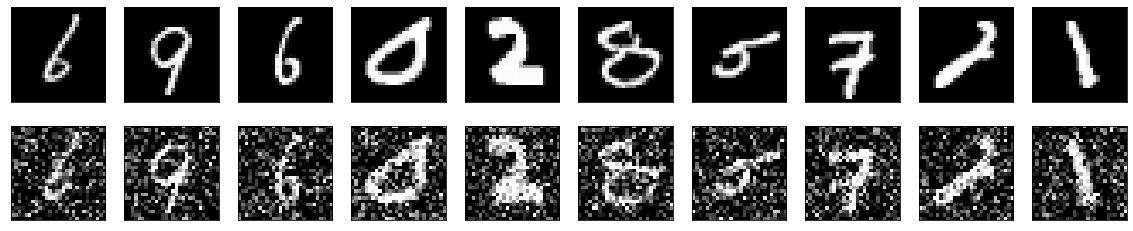

In [2]:
(train_data, _), (test_data, _) = mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

display(train_data, noisy_train_data)

## Autoencoder

In [3]:
input = layers.Input(shape=(28, 28, 1))

# Encoder block
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder block
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248  

In [4]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 11s 6ms/step - loss: 0.1332 - val_loss: 0.0732
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0717 - val_loss: 0.0695
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0692 - val_loss: 0.0679
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0680 - val_loss: 0.0671
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0672 - val_loss: 0.0664
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0666 - val_loss: 0.0659
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0662 - val_loss: 0.0655
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0658 - val_loss: 0.0652
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0655 - val_loss: 0.0649
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0652 - val_loss: 0.064

313/313 [==============================] - 1s 2ms/step


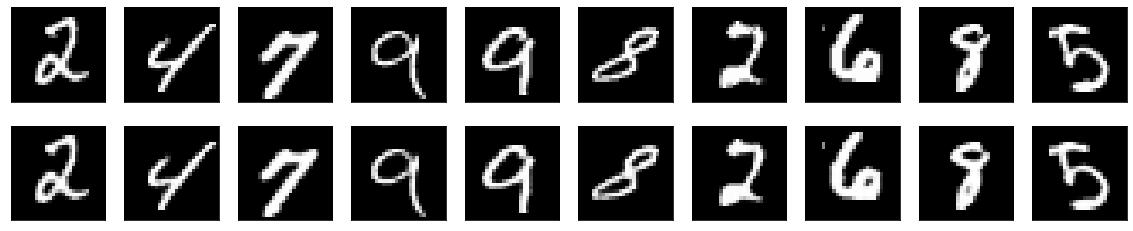

In [5]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

Retraining the autoencoder using the noisy data as input and the clean data as target. We want the autoencoder to
learn how to denoise the images.

In [6]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1010 - val_loss: 0.0942
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0938 - val_loss: 0.0920
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0921 - val_loss: 0.0907
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0910 - val_loss: 0.0900
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0903 - val_loss: 0.0895
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0897 - val_loss: 0.0890
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0893 - val_loss: 0.0884
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0888 - val_loss: 0.0882
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0885 - val_loss: 0.0877
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.0882 - val_lo

313/313 [==============================] - 1s 2ms/step


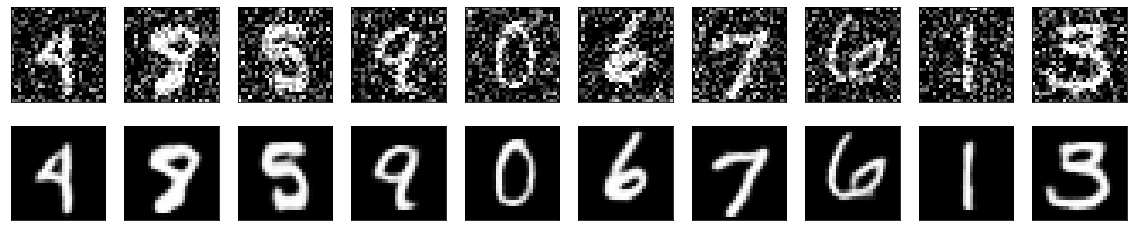

In [7]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)